In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
from src.graph import NetworkGraph

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

In [4]:
from src.MAPF.solver import Shortest_Path_with_waiting

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [6]:
number_agents = 12

size_side = 7
env = RailEnv(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()



env_renderer = RenderTool(env)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

complex_rail_generator: num_agents > nr_start_goal, changing num_agents


In [7]:
matrix_rail = np.array(env.rail.grid.tolist())

In [8]:
test = NetworkGraph(matrix_rail)

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


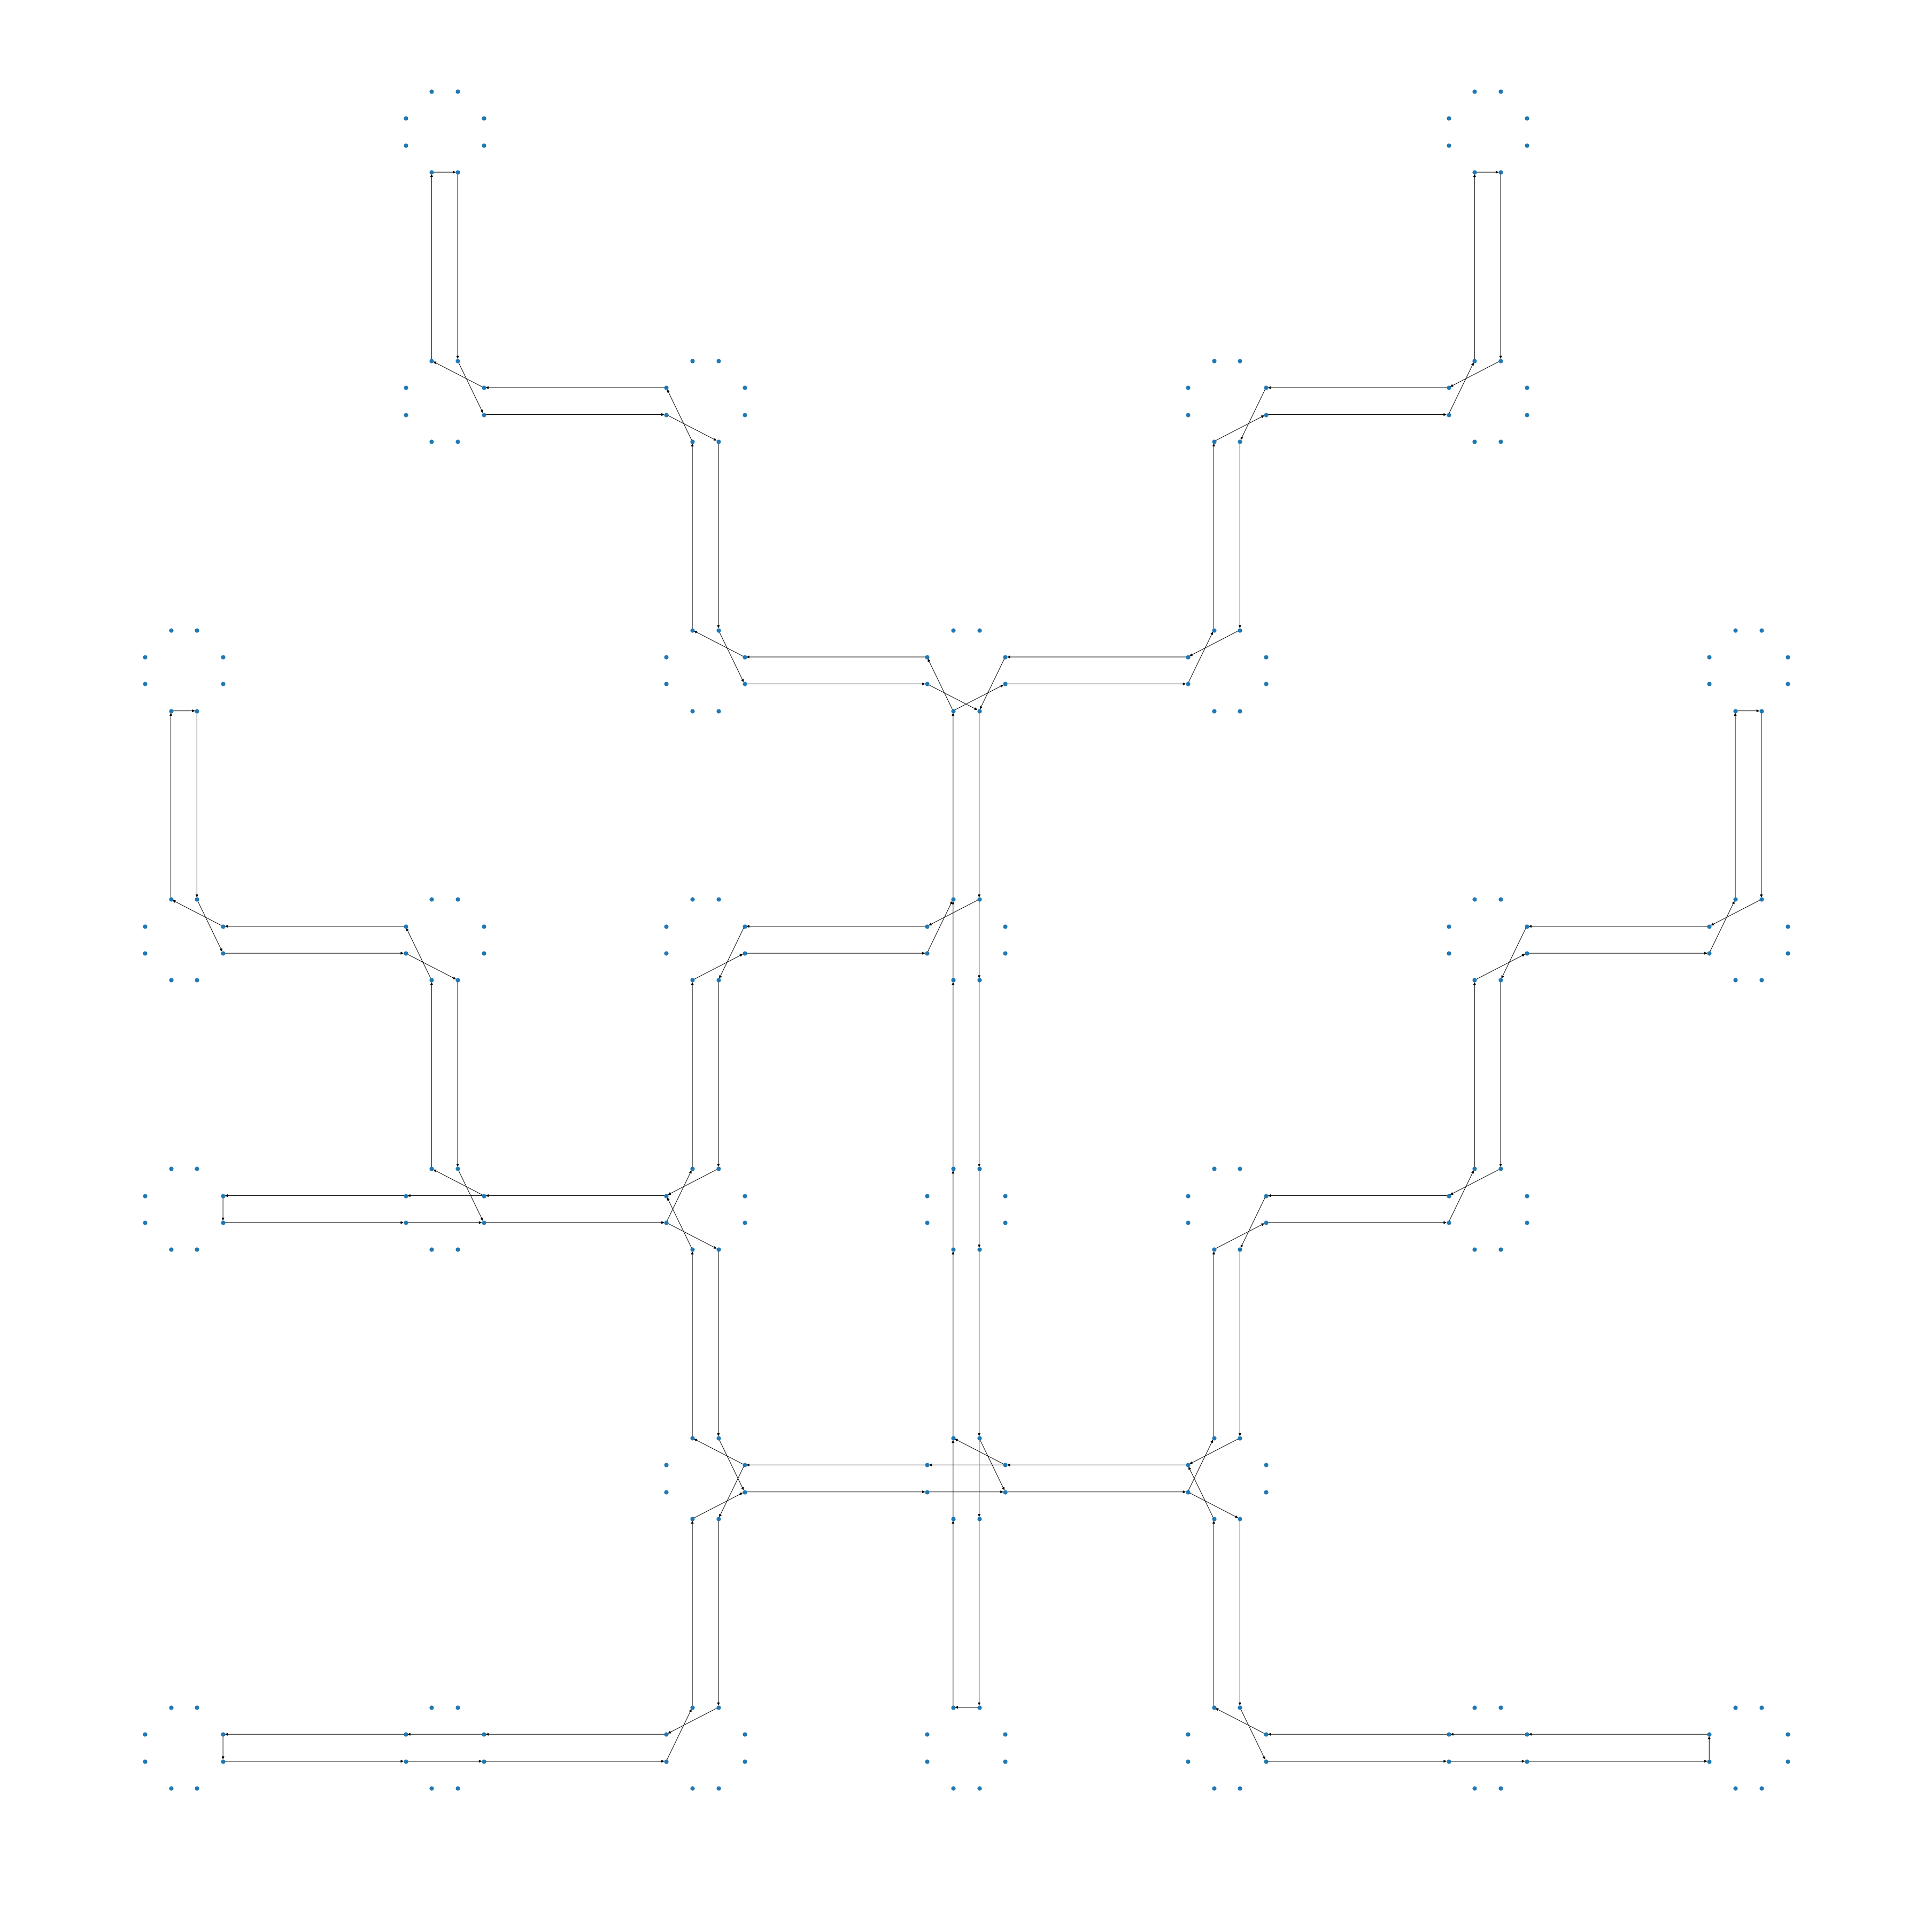

In [9]:
test.show(jitter = 0.1)

In [10]:
import json
print(set([test.get_cell_position_node(x.split("_")[0]) for x in list(test.nodes)]))

{(6, 6), (3, 0), (6, 2), (4, 0), (1, 2), (3, 3), (4, 4), (6, 3), (1, 5), (3, 6), (2, 2), (4, 1), (1, 1), (6, 4), (3, 2), (2, 6), (5, 4), (4, 5), (6, 0), (1, 4), (0, 5), (2, 3), (4, 2), (6, 5), (3, 5), (0, 1), (5, 3), (6, 1), (3, 1), (2, 0), (4, 3), (5, 2), (2, 4)}


In [12]:
test.getPositionConstraints()

[[('(0, 1)_S_in', '(0, 1)_S_out')],
 [('(0, 5)_S_in', '(0, 5)_S_out')],
 [('(1, 1)_N_in', '(1, 1)_E_out'), ('(1, 1)_E_in', '(1, 1)_N_out')],
 [('(1, 2)_S_in', '(1, 2)_W_out'), ('(1, 2)_W_in', '(1, 2)_S_out')],
 [('(1, 4)_S_in', '(1, 4)_E_out'), ('(1, 4)_E_in', '(1, 4)_S_out')],
 [('(1, 5)_W_in', '(1, 5)_N_out'), ('(1, 5)_N_in', '(1, 5)_W_out')],
 [('(2, 0)_S_in', '(2, 0)_S_out')],
 [('(2, 2)_N_in', '(2, 2)_E_out'), ('(2, 2)_E_in', '(2, 2)_N_out')],
 [('(2, 3)_S_in', '(2, 3)_E_out'),
  ('(2, 3)_S_in', '(2, 3)_W_out'),
  ('(2, 3)_W_in', '(2, 3)_S_out'),
  ('(2, 3)_E_in', '(2, 3)_S_out')],
 [('(2, 4)_W_in', '(2, 4)_N_out'), ('(2, 4)_N_in', '(2, 4)_W_out')],
 [('(2, 6)_S_in', '(2, 6)_S_out')],
 [('(3, 0)_N_in', '(3, 0)_E_out'), ('(3, 0)_E_in', '(3, 0)_N_out')],
 [('(3, 1)_S_in', '(3, 1)_W_out'), ('(3, 1)_W_in', '(3, 1)_S_out')],
 [('(3, 2)_S_in', '(3, 2)_E_out'), ('(3, 2)_E_in', '(3, 2)_S_out')],
 [('(3, 3)_S_in', '(3, 3)_N_out'),
  ('(3, 3)_W_in', '(3, 3)_N_out'),
  ('(3, 3)_N_in', '(3, 3